# Import Statements and support functions

In [1]:
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.svm import LinearSVC
import time
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pickle
from scipy.ndimage.measurements import label
import collections
from moviepy.editor import VideoFileClip


def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if conv == 'BGR2HLS':
        return cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    
    
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32,bins_range=(0, 256)):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

def plotImages(rows, cols, imgs, titles, cmap='hot', axis='on', figsize=(14, 10)):
    fig = plt.figure(figsize=figsize)
    
    for i, img in enumerate(imgs):
        
        plt.subplot(rows, cols, i + 1)
        plt.title(titles[i])
        plt.axis(axis)
        if len(img.shape) < 3:
            plt.imshow(img, cmap=cmap)
        else:
            plt.imshow(img)
    plt.show()
    
def get_random_hog(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    HLS_0 = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    HLS_1 = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    HLS_2 = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    # Define HOG parameters
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
    _, hog_image0 = get_hog_features(HLS_0[:,:,0], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
    _, hog_image1 = get_hog_features(HLS_1[:,:,1], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
    _, hog_image2 = get_hog_features(HLS_2[:,:,2], orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
    
    # Plot the examples
    fig = plt.figure(figsize=(10,10))
    plt.subplot(151)
    plt.imshow(image, cmap='gray')
    plt.title('Example Image')
    plt.subplot(152)
    plt.imshow(hog_image, cmap='gray')
    plt.title('gray HOG')
    plt.subplot(153)
    plt.imshow(hog_image0)
    plt.title('Y HOG')
    plt.subplot(154)
    plt.imshow(hog_image1)
    plt.title('Cr HOG')
    plt.subplot(155)
    plt.imshow(hog_image2)
    plt.title('Cb HOG')
    plt.show()

# Make short test video


 This shortens testing time early on when the code is far from perfect.

In [2]:
from moviepy.editor import *

video = VideoFileClip("project_video.mp4").subclip(15,20)
result = CompositeVideoClip([video])
result.write_videofile("short.mp4")

[MoviePy] >>>> Building video short.mp4
[MoviePy] Writing audio in shortTEMP_MPY_wvf_snd.mp3


100%|██████████████████████████████████████| 111/111 [00:00<00:00, 1155.31it/s]


[MoviePy] Done.
[MoviePy] Writing video short.mp4


 99%|███████████████████████████████████████▋| 125/126 [00:02<00:00, 52.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: short.mp4 



# Function to get features from single images

In [3]:



def singleImageFeatures(img, features):
    
    feature_vec = []
    # Convert color space
    if color!='RGB':
        if color == 'BGR': 
             feature_image = np.copy(img)
        elif color == 'RGB': 
             feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        elif color == 'HLS': 
             feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        elif color == 'HSV': 
             feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color == 'YUV': 
             feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        elif color == 'YCrCb': 
             feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    else: feature_image = np.copy(img)
        
    # Spatial features
    if features[0][0]:
        img_resized = cv2.resize(feature_image, features[2])
        s0 = img_resized[:,:,0].ravel()
        s1 = img_resized[:,:,1].ravel()
        s2 = img_resized[:,:,2].ravel()
        feature_vec = np.concatenate((feature_vec, s0, s1, s2))
        
    # Color histogram features
    if features[0][1]:
        c0 = np.histogram(feature_image[:,:,0], bins=features[3])[0]
        c1 = np.histogram(feature_image[:,:,1], bins=features[3])[0]
        c2 = np.histogram(feature_image[:,:,2], bins=features[3])[0]
        feature_vec = np.concatenate((feature_vec, c0, c1, c2))
        
    # Get hog features
    if features[0][2]:
        h0 = hog(feature_image[:,:,0], features[4], features[5], features[6])
        h1 = hog(feature_image[:,:,1], features[4], features[5], features[6])
        h2 = hog(feature_image[:,:,2], features[4], features[5], features[6])
        feature_vec = np.concatenate((feature_vec, h0, h1, h2))
        
    return feature_vec

def getFeatures(filenames, features):
    feature_vec = []
    for f in filenames: 
        img = cv2.imread(f)
        feature_vec.append(singleImageFeatures(img, features))
    return feature_vec

# Exploring Data Set

Grabs and displays a sample of 5 vehicle images and 5 non-vehicle images from the image files.

Vehicles: 8792
Non-Vehicles: 8968
Sample Image shape =  (64, 64, 3)
Vehicles


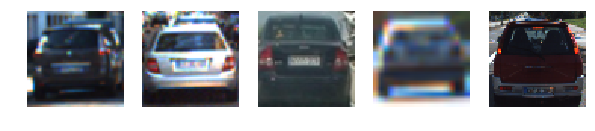

Non Vehicles


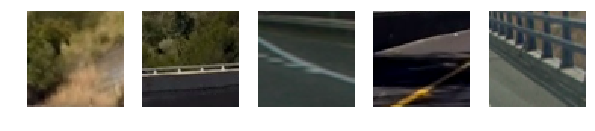

In [4]:

#gets names of all images, vehicle and non-vehicle
vehicles_train_filenames = glob.glob('./images/vehicles/**/*.png', recursive=True)
non_vehicles_train_filenames = glob.glob('./images/non-vehicles/**/*.png', recursive=True)

print('Vehicles:', len(vehicles_train_filenames))
print('Non-Vehicles:', len(non_vehicles_train_filenames))

sample_image = cv2.imread(vehicles_train_filenames[0])
print("Sample Image shape = ",sample_image.shape)

SAMPLES =5

images = []

for i in np.random.randint(0, len(vehicles_train_filenames), SAMPLES):
    images.append(cv2.cvtColor(cv2.imread(vehicles_train_filenames[i]), cv2.COLOR_BGR2RGB))
print('Vehicles')
plotImages(1, SAMPLES, images, ['']*SAMPLES, axis='Off', figsize=(10,2))

images2 = []

for i in np.random.randint(0, len(non_vehicles_train_filenames), SAMPLES):
    images2.append(cv2.cvtColor(cv2.imread(non_vehicles_train_filenames[i]), cv2.COLOR_BGR2RGB))
print('Non Vehicles')
plotImages(1, SAMPLES, images2, ['']*SAMPLES, axis='Off', figsize=(10,4))

# Random Car Images and their HOG

Takes 5 car samples and views their HOG transforms in gray each color (H,L,S).

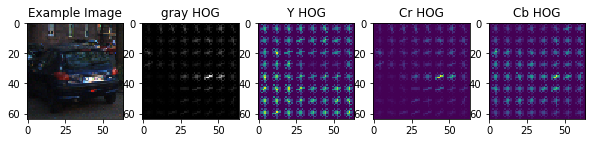

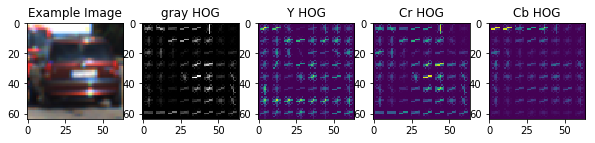

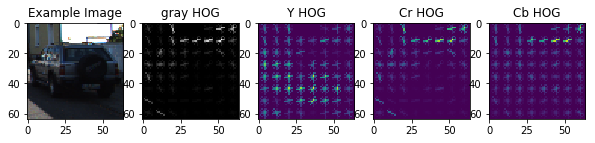

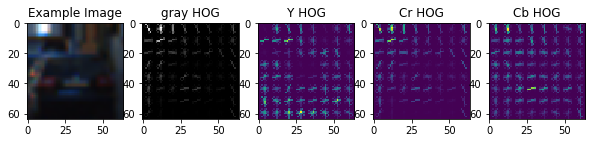

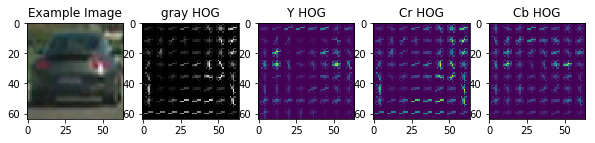

In [5]:
# Generate a random index to look at a car image
SAMPLE = 4
for i in np.random.randint(0, len(vehicles_train_filenames), SAMPLES):
    image = mpimg.imread(vehicles_train_filenames[i])
    get_random_hog(image)


# Random Non-Car Images and their HOG

Takes 5 non-car samples and views their HOG transforms in gray each color (H,L,S).

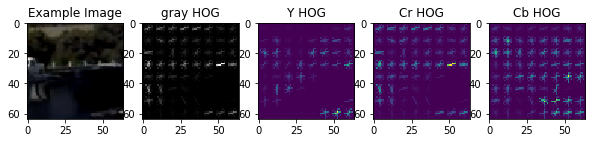

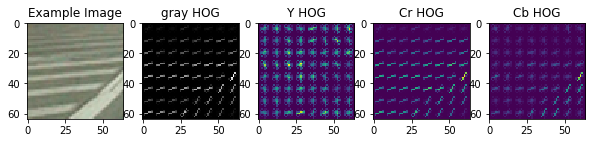

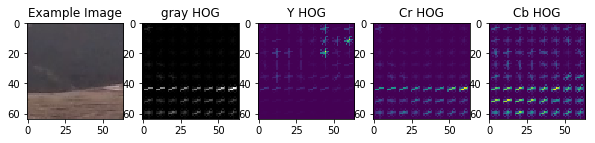

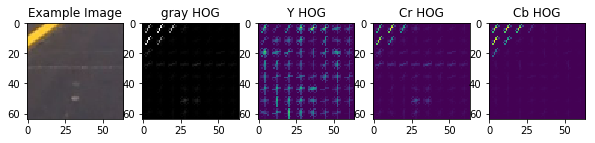

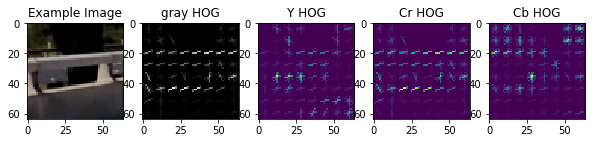

In [6]:
   
SAMPLE = 4 
for i in np.random.randint(0, len(vehicles_train_filenames), SAMPLES):
    image = mpimg.imread(non_vehicles_train_filenames[i])
    get_random_hog(image)

# Classifier

I chose to use LinearSVC for the classifier. The features were normalized using StandardScalar().fit().

In [7]:
def trainClassifier(vehicle_features, non_vehicle_features):
    X = np.vstack((vehicle_features, non_vehicle_features))
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    y = np.hstack((np.ones(len(vehicle_features)), np.zeros(len(non_vehicle_features))))
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=rand_state)
    svc = LinearSVC()
    svc.fit(X_train, y_train)
    acc = svc.score(X_test, y_test)
    return acc, svc, scaler
    

# Classifier Settings

I extensively explored the settings in lesson 17, lecture 29. HLS narrowly beat out several other choices for color space. Hence, I chose to use HLS. The other features were similarly tested in lecture 29's code sample.

In [8]:
#settings used based on lesson 17 lecture 29.
used_features = (1,1,1)
color = 'HLS'
cspace = 'HLS'

spatial_size = (32,32)
hist_bins = 32
orient = 9
pixels_per_cell = (8,8)
cells_per_block = (2,2)
hog_channel = 'ALL'

feature_set = [used_features, color, spatial_size, hist_bins, orient, pixels_per_cell, cells_per_block]

# Train Classifier

Using the parameters that I chose above the classifier produced a test accuracy of 98.9% from a feature length of 8460.

In [9]:
print("vehicles_train_filenames length = ",len(vehicles_train_filenames))
print("non vehicles_train_filenames length = ",len(non_vehicles_train_filenames))

t=time.time()

vehicle_features = getFeatures(vehicles_train_filenames, feature_set)
non_vehicle_features = getFeatures(non_vehicles_train_filenames, feature_set)

print("get_vehicle_features length = ",len(vehicle_features[0]))
print("get_non_vehicle_features length = ",len(non_vehicle_features[0]))

acc, svc, scaler = trainClassifier(vehicle_features, non_vehicle_features)

# Save scaler and classifier
print('Save classifier...', end='')
pickle_data = {'scaler': scaler, 'svc': svc}
with open('classifier.p', 'wb') as f:
    pickle.dump(pickle_data, f)
    

print(round(time.time() - t, 2), 's')
print('Test accuracy =', round(acc*100, 4),'%')

vehicles_train_filenames length =  8792
non vehicles_train_filenames length =  8968
get_vehicle_features length =  8460
get_non_vehicle_features length =  8460
Save classifier...80.4 s
Test accuracy = 99.3806 %


# Slideing Windows

The road image has to be broken up into small parts for identifying where the other vehicles are. The code below cycles thru those small parts.

In [10]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    

# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[400, None], y_start_stop=[None, None], 
                    xy_window=[64, 64], xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


# Draw Grid

Two sets of grids are generated. One is for small objects in the distance and one for closer objects. Additional grids could have been implemented, but it would have driven the computational time too long. The grids were built individually once, then generated together in the drawgrids function. Also, the area to be searched has been shrunk. Since it is beyond the scope of this exercise to worry about cars falling from the sky or hiding in tree tops; the top part of the image has been removed from the seach zone.

image.shape =  (720, 1280, 3)
window_img.shape =  (720, 1280, 3)


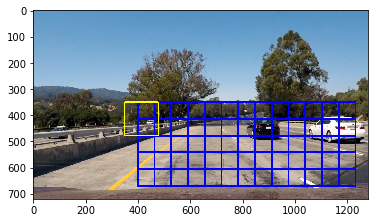

image.shape =  (720, 1280, 3)
window_img.shape =  (720, 1280, 3)


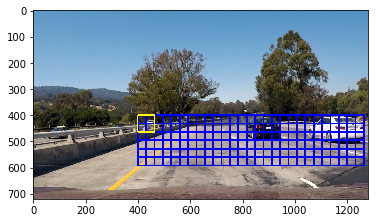

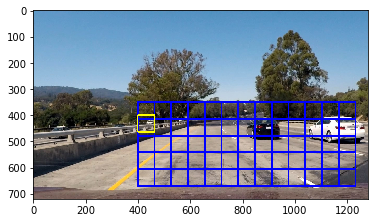

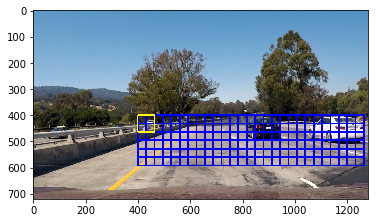

In [11]:
SCALE_WINDOWS = [ (350, 700, 0.5), (400, 600, 1.0)]

image = mpimg.imread('./test_images/test1.jpg')
y_start_stop =[350,700]
print("image.shape = ",image.shape)
windows = slide_window(image, x_start_stop=[400, None], y_start_stop=[350,700], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)  
cv2.rectangle(window_img, (350,350), (478,478), (255,255,0), 3)     
print("window_img.shape = ",window_img.shape)
plt.imshow(window_img)
plt.show()

image = mpimg.imread('./test_images/test1.jpg')
y_start_stop =[400,600]
print("image.shape = ",image.shape)
windows = slide_window(image, x_start_stop=[400, None], y_start_stop=[400,600], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))
                  
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)  
cv2.rectangle(window_img, (400,400), (464,464), (255,255,0), 3)     
print("window_img.shape = ",window_img.shape)
plt.imshow(window_img)
plt.show()

def drawgrids(image, scale_windows):
    y_start_stop = []
    for scale in scale_windows:
        #print("scale = ",scale)
        y_start_stop = scale[:2]
        #print("y_start_stop = ",y_start_stop)
        xy_window=[64, 64]
        xy_window[0] = int(xy_window[0]/scale[2])
        xy_window[1] = int(xy_window[1]/scale[2])
        #print("xy_window = ",xy_window)
        windows = slide_window(image, x_start_stop=[400, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window, xy_overlap=(0.5, 0.5))
           
        window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)  
        cv2.rectangle(window_img, (400,400), (464,464), (255,255,0), 3)     
        plt.imshow(window_img)
        plt.show()
drawgrids(image, SCALE_WINDOWS)        

# Search_Windows

Now the grids must be searched. Each box, or window, in the grid is tested to see if it contains the features of a car. If so that box is added to the list of boxs that are returned from the function.

In [12]:


# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel='ALL', spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))   
        #4) Extract features for that window using single_img_features()
        features = singleImageFeatures(test_img, feature_set)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    

# Search single image

The test image is searched for cars. As can be seen in the returned image below, the two nearby cars are identified. Two or three cars on the opposite side of the interstate are identified and perhaps one or two misidentifications are made of the guard rail.

vehicle_features length =  8460
non_vehicle_features length =  8460
X.shape =  (17760, 8460)
scaled_X.shape =  (17760, 8460)
Using: 9 orientations 8 pixels per cell and 2 cells per block
5.69 Seconds to train SVC...
Test Accuracy of SVC =  0.9896


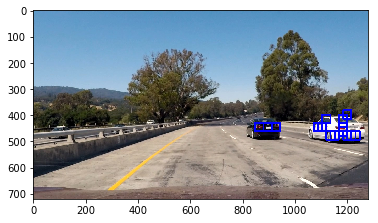

In [13]:

### TODO: Tweak these parameters and see how the results change.
color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [350, 700] # Min and max in y to search in slide_window()

print("vehicle_features length = ",len(vehicle_features[0]))
print("non_vehicle_features length = ",len(non_vehicle_features[0]))




X = np.vstack((vehicle_features, non_vehicle_features)).astype(np.float64)       
print("X.shape = ",X.shape)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)
print("scaled_X.shape = ",scaled_X.shape)
# Define the labels vector
y = np.hstack((np.ones(len(vehicle_features)), np.zeros(len(non_vehicle_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

image = mpimg.imread('./test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[400, None], y_start_stop=y_start_stop, 
                    xy_window=(32, 32), xy_overlap=(0.5, 0.5))
hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

plt.show()


# Add Heat

Are each 'car' is identified the pixels in that box get a point added to them. The more points a pixel has the greater chance it is acutally a car and not a misidentification. A 'heatmap' is produced showing the clusters of pixels. The hotter the cluster then the higher probablity it is a car. Note that in the image below the large clusters have identifed the two cars, while the other three boxes only got one point each.

len(heat) =  720
heat.shape =  (720, 1280)
len(heat) =  720
heat =  [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


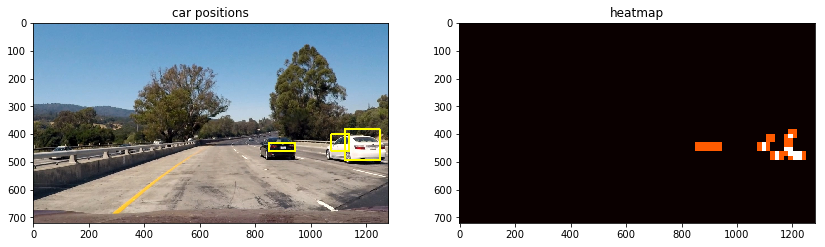

In [14]:

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 

heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    #print("heatmap.shape = ",heatmap.shape)
    #print("threshold = ",threshold)
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
   
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (255, 255, 0), 6)# yellow boxes
    # Return the image
    return img

# Add heat to each box in box list
print("len(heat) = ",len(heat))
print("heat.shape = ",heat.shape)
heat = add_heat(heat,hot_windows)
#heat = add_heat(heat,hot_windows)
print("len(heat) = ",len(heat))
print("heat = ",heat)   
# Apply threshold to help remove false positives
heat = apply_threshold(heat,.1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)

draw_img = draw_labeled_bboxes(np.copy(image), labels)
#draw_img = draw_labeled_bboxes(image, labels)

#fig = plt.figure()
#plt.subplot(121)
#plt.imshow(draw_img)
#plt.title('Car Positions')
#plt.subplot(122)
#plt.imshow(heatmap, cmap='hot')
#plt.title('Heat Map')
#fig.tight_layout()
#plt.show()

plotImages(1, 2, [draw_img, heatmap], ['car positions', 'heatmap'])

# Finding the Cars

Finally everything can be brought together in the find_cars function. The grids are each searched in turn looking for the HOG features. Those that are found are added to the heat map. The function returns the image with the yellow boxes drawn at the locations of positive identifcations, and the heat map list which contains all of the identified boxes.

len(heat_map) =  14
heat_map =  [((808, 400), (904, 496)), ((832, 400), (928, 496)), ((856, 400), (952, 496)), ((976, 400), (1072, 496)), ((1024, 400), (1120, 496)), ((1048, 400), (1144, 496)), ((1048, 424), (1144, 520)), ((1096, 400), (1192, 496)), ((1096, 424), (1192, 520)), ((1120, 400), (1216, 496)), ((1120, 424), (1216, 520)), ((1120, 448), (1216, 544)), ((1144, 400), (1240, 496)), ((1144, 424), (1240, 520))]


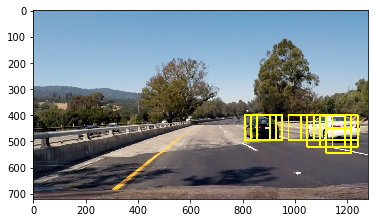

In [58]:


image = mpimg.imread('./test_images/test4.jpg')


img = image

color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [350, 700] # Min and max in y to search in slide_window()


feature_set = [used_features, color, spatial_size, hist_bins, orient, pixels_per_cell, cells_per_block]

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    heatmap = []
    #heatmap = np.zeros_like(img[:,:,0])
    draw_img = np.copy(img)
    #img = img.astype(np.float32)/255
   
    img_tosearch = img[ystart:ystop,400:1280,:]
    
    ctrans_tosearch = convert_color(img_tosearch, conv='BGR2HLS')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left+400, ytop_draw+ystart),(xbox_left+win_draw+400,ytop_draw+win_draw+ystart),(255,255,0),6) 
                #print("xbox_left = ",xbox_left)
                #print("ytop_draw = ",ytop_draw)
                #print("win_draw = ",win_draw)
                #print("ystart = ",ystart)
                heatmap.append(((xbox_left+400, ytop_draw+ystart),(xbox_left+win_draw+400,ytop_draw+win_draw+ystart)))
                
    return draw_img,heatmap
    
ystart = 400
ystop = 656
scale = 1.5
    
out_img,heat_map = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
print("len(heat_map) = ",len(heat_map))
print("heat_map = ",heat_map)
#plt.imshow(heat_map)
#plt.show()
plt.imshow(out_img)
plt.show()

# Adding heat again


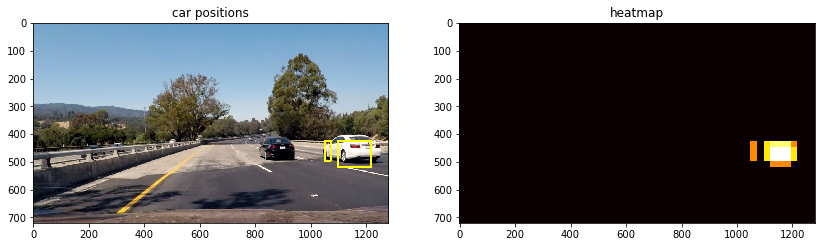

In [59]:

heat = np.zeros_like(image[:,:,0]).astype(np.float)
box_list = heat_map

# Add heat to each box in box list
heat = add_heat(heat,box_list)

# Apply threshold to help remove false positives
heat = apply_threshold(heat,3)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)

draw_img = draw_labeled_bboxes(np.copy(image), labels)

#fig = plt.figure()
#plt.subplot(121)
#plt.imshow(draw_img)
#plt.title('Car Positions')
#plt.subplot(122)
#plt.imshow(heatmap, cmap='hot')
#plt.title('Heat Map')
#fig.tight_layout()
#plt.show()

plotImages(1, 2, [draw_img, heatmap], ['car positions', 'heatmap'])

# Processing the Video

Each frame of the video is processed in turn by the find_cars function. A list, box_list, is made of each frame's heat maps. A threshold test is applied where pixels whose boxes have received too few hits are not displayed. Trial and error showed that a threshold of 3 produced the best results.

In [61]:
#last_heatmaps = collections.deque(maxlen=25)
#print(dir(last_heatmaps))
#print("last_heatmaps.__sizeof__ = ",last_heatmaps.__sizeof__)
#flip function is for testing video 
def flip(image):
    """Flips an image vertically """
    return image[::-1] # remember that image is a numpy array


def processImage(img):
    global last_heatmaps
    global last_bboxes
    #out_img, all_windows = find_cars(img,ystart=ystart,ystop=ystop,scale=scale,svc=svc,X_scaler=X_scaler,orient=orient,
     #            pix_per_cell=pix_per_cell,cell_per_block=cell_per_block,spatial_size=spatial_size,
    #            hist_bins=hist_bins)
     
    out_img, bboxes = find_cars(img,ystart=ystart,ystop=ystop,scale=scale,svc=svc,X_scaler=X_scaler,orient=orient,
                 pix_per_cell=pix_per_cell,cell_per_block=cell_per_block,spatial_size=spatial_size,
                 hist_bins=hist_bins)
    
    
    last_bboxes.append(bboxes)
    last_bboxes = last_bboxes[-8:]
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    heat = add_heat(heat,[bbox for bboxes in last_bboxes for bbox in bboxes])
    heat = apply_threshold(heat,6)
    heatmap = np.clip(heat, 0, 255)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)

    #second scheme below
    
    #print("last_heatmaps.__sizeof__ = ",last_heatmaps.__sizeof__)
    #sum_heatmap = np.array(last_heatmaps).sum(axis=0)
    #print("sum_heatmap.shape = ",sum_heatmap.shape)
    #heat_map = apply_threshold(sum_heatmap, 18)
    #labels = label(heat_map)
    #draw_img = draw_labeled_bboxes(np.copy(img), labels)
    #map_image = sum_heatmap.astype(np.uint8) * 3
    #gray_view = cv2.cvtColor(cv2.cvtColor(cv2.resize(np.copy(img), (360, 180)) , cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB)
    #hm_view = cv2.cvtColor(cv2.resize(cv2.applyColorMap(map_image, cv2.COLORMAP_HOT), (360, 180)), cv2.COLOR_BGR2RGB)
    #draw_img[0:180, 0:360] = cv2.addWeighted(gray_view, 0.5, hm_view, 0.5, 0.0)
   


    #old scheme below
    
    
    #heat = np.zeros_like(image[:,:,0]).astype(np.float)
    #box_list = all_windows
    
    # Add heat to each box in box list
    #heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    #heat = apply_threshold(heat,3)

    # Visualize the heatmap when displaying    
    #heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    #labels = label(heatmap)
    #draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    return draw_img

last_bboxes= []
#input_video = 'short.mp4'
input_video = 'project_video.mp4'
output_video = 'out_project_video36.mp4'

clip = VideoFileClip(input_video)
new_clip = clip.fl_image(processImage)
%time new_clip.write_videofile(output_video, audio=False)







[MoviePy] >>>> Building video out_project_video36.mp4
[MoviePy] Writing video out_project_video36.mp4



100%|█████████████████████████████████████▉| 1260/1261 [05:23<00:00,  4.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: out_project_video36.mp4 

Wall time: 5min 24s


# Discussion

   There are improvements that can be made. Just as ignoring cars hiding in tree tops or falling from the sky the cars on the other side of the interstate could be ignored. That part of the images could be masked out removing the false positives that the guard rails generate. This would be fine for a classroom environment, but would not be acceptable in the real world. Sometimes those cars on the other side of the interstate don't stay on the other side. Another improvement might be to make more grids at additional scales or just make each box in the grid smaller. 
   The Label function in scipy.ndimage.measurements turned out to be incredibly useful. At the start of this project I was ignorant of it's existance. The Wikipedia entry on it and the graph theory it derives from is quite good. I'm assuming that if I greatly increased the number of grid boxes that Label could handle it. I might be wrong. I suspect that at some large number of points the Label function will become unwieldy. So that improvement might not work.
   
   As a closing note, I have found these 5 projects in Term 1 to be really challenging. Only the constant threat of deadlines have kept me on schedule. Without that threat, I would have dragged these project out all year. 

# Additions following Review


   I have tried the suggested changes YCbCr works better that HLS at seeing the cars, but it produces far more false positives. So I went back to HLS, I changed the overlap to .75 from .5 it improved things some. I'm using a faster machine now so I did not need to try the gray image only on HOG to speed things up. I was able to find a work around for the subsequent frame issue. 
   The code is not pretty at this point, but I am out of time. Please don't misunderstand the ugliness of the code for any disrespect. My Uber ride to the airport will be here momentarily.
   
   Cheers,
   
   Bob
